<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/CNNpredictAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/crop_part1/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('0_'):
    output = 1.0
  if file.startswith('1_'):
    output = 2.0
  if file.startswith('2_'):
    output = 3.0
  if file.startswith('3_'):
    output = 4.0
  if file.startswith('4_'):
    output = 5.0
  if file.startswith('5_'):
    output = 6.0
  if file.startswith('6_'):
    output = 7.0
  if file.startswith('7_'):
    output = 8.0
  if file.startswith('8_'):
    output = 9.0
  if file.startswith('9_'):
    output = 10.0
  if file.startswith('10_'):
    output = 11.0
  if file.startswith('11_'):
    output = 12.0
  if file.startswith('12_'):
    output = 13.0
  if file.startswith('13_'):
    output = 14.0
  if file.startswith('14_'):
    output = 15.0
  if file.startswith('15_'):
    output = 16.0
  if file.startswith('16_'):
    output = 17.0
  if file.startswith('17_'):
    output = 18.0
  if file.startswith('18_'):
    output = 19.0
  if file.startswith('19_'):
    output = 20.0
  if file.startswith('20_'):
    output = 21.0
  if file.startswith('21_'):
    output = 22.0
  if file.startswith('22_'):
    output = 23.0
  if file.startswith('23_'):
    output = 24.0
  if file.startswith('24_'):
    output = 25.0
  if file.startswith('25_'):
    output = 26.0
  if file.startswith('26_'):
    output = 27.0
  if file.startswith('27_'):
    output = 28.0
  if file.startswith('28_'):
    output = 29.0
  photo = load_img(folder + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Colab Notebooks/photos3.npy',photos_train)
save('/content/drive/MyDrive/Colab Notebooks/labels3.npy',labels_train)


(5470, 150, 150, 3) (5470,)


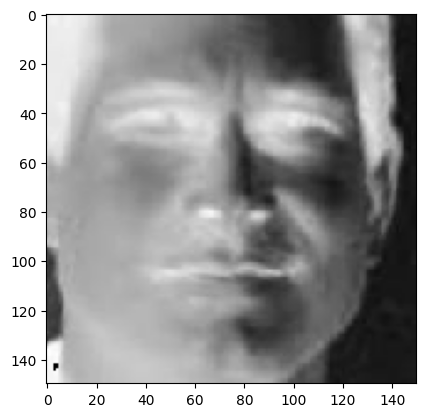

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = photos_train[55]
plt.imshow((img*255).astype(np.uint8))
plt.show()

In [ ]:
photos_train = photos_train.reshape(5470, 150, 150, 3)
photos_train = photos_train.astype('float32')/255 
from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
photos_train.shape, labels_train.shape,

((5470, 150, 150, 3), (5470, 30))

In [ ]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 30
classes = 30


model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (150,150,3), padding = 'same')) 
# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [ ]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelpredictFace.h5')

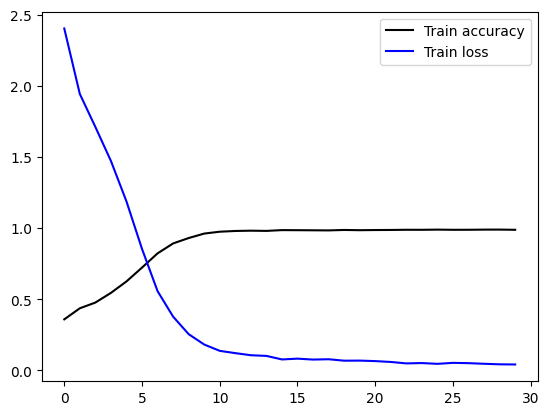

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [ ]:
folder = '/content/drive/MyDrive/testPredictFace/'

photos2, labels2 = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('0_'):
    output = 1.0
  if file.startswith('1_'):
    output = 2.0
  if file.startswith('2_'):
    output = 3.0
  if file.startswith('3_'):
    output = 4.0
  if file.startswith('4_'):
    output = 5.0
  if file.startswith('5_'):
    output = 6.0
  if file.startswith('6_'):
    output = 7.0
  if file.startswith('7_'):
    output = 8.0
  if file.startswith('8_'):
    output = 9.0
  if file.startswith('9_'):
    output = 10.0
  if file.startswith('10_'):
    output = 11.0
  if file.startswith('11_'):
    output = 12.0
  if file.startswith('12_'):
    output = 13.0
  if file.startswith('13_'):
    output = 14.0
  if file.startswith('14_'):
    output = 15.0
  if file.startswith('15_'):
    output = 16.0
  if file.startswith('16_'):
    output = 17.0
  if file.startswith('17_'):
    output = 18.0
  if file.startswith('18_'):
    output = 19.0
  if file.startswith('19_'):
    output = 20.0
  if file.startswith('20_'):
    output = 21.0
  if file.startswith('21_'):
    output = 22.0
  if file.startswith('22_'):
    output = 23.0
  if file.startswith('23_'):
    output = 24.0
  if file.startswith('24_'):
    output = 25.0
  if file.startswith('25_'):
    output = 26.0
  if file.startswith('26_'):
    output = 27.0
  if file.startswith('27_'):
    output = 28.0
  if file.startswith('28_'):
    output = 29.0
  photo = load_img(folder + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos2.append(photo)
  labels2.append(output)
photos_test = asarray(photos2)
labels_test = asarray(labels2)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/anhlop_test/photos.npy',photos_test)
save('/content/drive/MyDrive/anhlop_test/labels.npy',labels_test)

(31, 150, 150, 3) (31,)


1/1 [==============================] - 0s 91ms/step
Predicted:  20


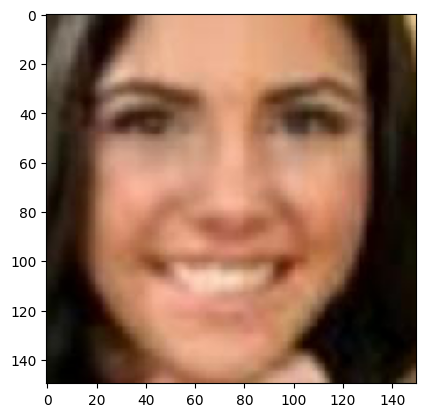

In [ ]:
class_name = {1: '0',2: '1',3: '2',4: '3',5: '4',6:'5',7:'6',8:'7',9:'8',10:'9',11:'10',12:'11',13:'12',14:'13',
15:'14',16:'15',17:'16',18:'17',19:'18',20:'19',21:'20',22:'21',23:'22',24:'23',25:'24',26:'25',27:'26',28:'27',29:'28',30:'29'}
#test
filePath = '/content/drive/MyDrive/testPredictFace/20_1_0_20170105184054896.jpg.chip.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 73ms/step
Predicted:  24


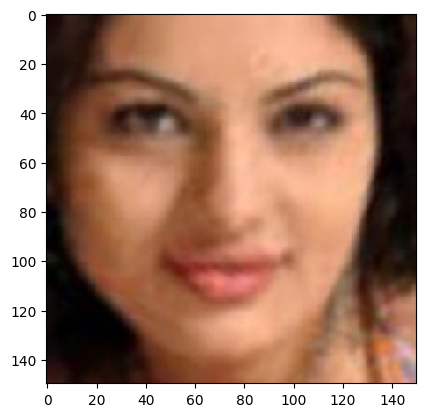

In [ ]:
#test
filePath = '/content/drive/MyDrive/testPredictFace/24_1_3_20170104222402975.jpg.chip.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)